In [28]:
import pandas as pd
from sklearn.decomposition import PCA

data_path = '../db/dataset_tissue.txt'
data = pd.read_csv(data_path, sep=',', header=0, index_col=0)

classes_path = '../db/clase.txt'
classes = pd.read_csv(classes_path, sep=',', header=0, index_col=0)

data_transposed = data.transpose()


# Aplicar PCA para retener el 95% de la varianza
pca_95 = PCA(n_components=0.95)
data_pca = pca_95.fit_transform(data_transposed)

print('Número de componentes principales: ', pca_95.n_components_)

Número de componentes principales:  66


In [29]:
print(data_path)

../db/dataset_tissue.txt


In [30]:
print(data_pca)

[[-3.33676372e+01 -2.76013990e+01  5.09260617e+01 ...  2.14933111e+00
  -6.55396458e-01 -1.83140225e-02]
 [-4.14831033e+01 -3.69912840e+01  3.64568742e+01 ... -1.51274641e+00
  -2.93012850e+00 -3.10982748e+00]
 [-4.13231142e+01  3.80354070e+00  3.61291140e+01 ... -2.29627073e+00
  -1.06250585e+00  4.26474507e+00]
 ...
 [-4.39633078e+01 -3.62730025e+01 -1.10213225e+01 ... -7.67447977e-01
   1.94993549e+00 -2.28588454e+00]
 [-4.54840609e+01 -2.44160910e+01 -2.13378478e+01 ...  2.92294527e+00
  -3.73504158e+00 -3.53428007e+00]
 [-5.18981521e+01 -2.20163393e+01 -2.71442949e+01 ... -1.34782287e+00
   9.86196795e-01  5.01253938e+00]]


In [32]:
data_pca

array([[-3.33676372e+01, -2.76013990e+01,  5.09260617e+01, ...,
         2.14933111e+00, -6.55396458e-01, -1.83140225e-02],
       [-4.14831033e+01, -3.69912840e+01,  3.64568742e+01, ...,
        -1.51274641e+00, -2.93012850e+00, -3.10982748e+00],
       [-4.13231142e+01,  3.80354070e+00,  3.61291140e+01, ...,
        -2.29627073e+00, -1.06250585e+00,  4.26474507e+00],
       ...,
       [-4.39633078e+01, -3.62730025e+01, -1.10213225e+01, ...,
        -7.67447977e-01,  1.94993549e+00, -2.28588454e+00],
       [-4.54840609e+01, -2.44160910e+01, -2.13378478e+01, ...,
         2.92294527e+00, -3.73504158e+00, -3.53428007e+00],
       [-5.18981521e+01, -2.20163393e+01, -2.71442949e+01, ...,
        -1.34782287e+00,  9.86196795e-01,  5.01253938e+00]])

In [36]:
# PCA
pca_66 = PCA(n_components=66)
data_pca_66 = pca_66.fit_transform(data_pca)

#  tabla de la varianza de los componentes
explained_variance_ratio_63 = pca_66.explained_variance_ratio_
components_df = pd.DataFrame({
    'Componente': range(1, 67),
    'Varianza explicada (%)': explained_variance_ratio_63 * 100
})

print(components_df)


    Componente  Varianza explicada (%)
0            1               34.768254
1            2               14.734706
2            3                9.423789
3            4                6.591392
4            5                5.605731
..         ...                     ...
61          62                0.108298
62          63                0.106254
63          64                0.105795
64          65                0.102745
65          66                0.099540

[66 rows x 2 columns]


In [37]:
print(pca_66)

PCA(n_components=66)


In [39]:
import numpy as np
import matplotlib.pyplot as plt

def distance(v1,v2):
    return np.linalg.norm(v1 - v2)

def Init_Centroide(data, k):
    centroides = set()
    num_pixels = data.shape[0]

    while len(centroides) < k:
        rand_index = np.random.randint(0, num_pixels)
        centroid = tuple(data[rand_index])
        centroides.add(centroid)
        centroides_iniciales = np.array(list(centroides))
    return centroides_iniciales

def return_new_centroide(grupos, data, k):
    new_centroids = []
    for i in range(k):
        points_in_cluster = data[grupos == i]
        if len(points_in_cluster) == 0:
            new_centroid = data[np.random.choice(data.shape[0], 1, replace=False)]
        else:
            new_centroid = np.mean(points_in_cluster, axis=0)
        new_centroids.append(new_centroid)
    return np.array(new_centroids, dtype=object)

def get_cluster(data, centroids):
    clusters = np.zeros(len(data))
    for i in range(len(data)):
        distances = [distance(data[i], centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters[i] = cluster
    return clusters

def distancia_promedio_centroides(old_centroide, new_centroide):
    suma_d= 0
    if old_centroide.shape != new_centroide.shape:
        raise ValueError("Las dimensiones deben coincidir")
    for i in range(old_centroide.shape[0]):
        suma_d += distance(old_centroide[i], new_centroide[i])
    return suma_d / old_centroide.shape[0]

def kmeans(data, k, umbral):
    centroides =  Init_Centroide(data, k)
    clusters   =  get_cluster(data, centroides)
    new_centroides = return_new_centroide(clusters, data, k)
    while(distancia_promedio_centroides(centroides, new_centroides) > umbral):
        centroides = new_centroides
        clusters   =  get_cluster(data, centroides)
        new_centroides = return_new_centroide(clusters, data, k)
    return new_centroides, clusters

In [40]:
centroides_final, clusters_custom = kmeans(data_pca, 8, 4.5)

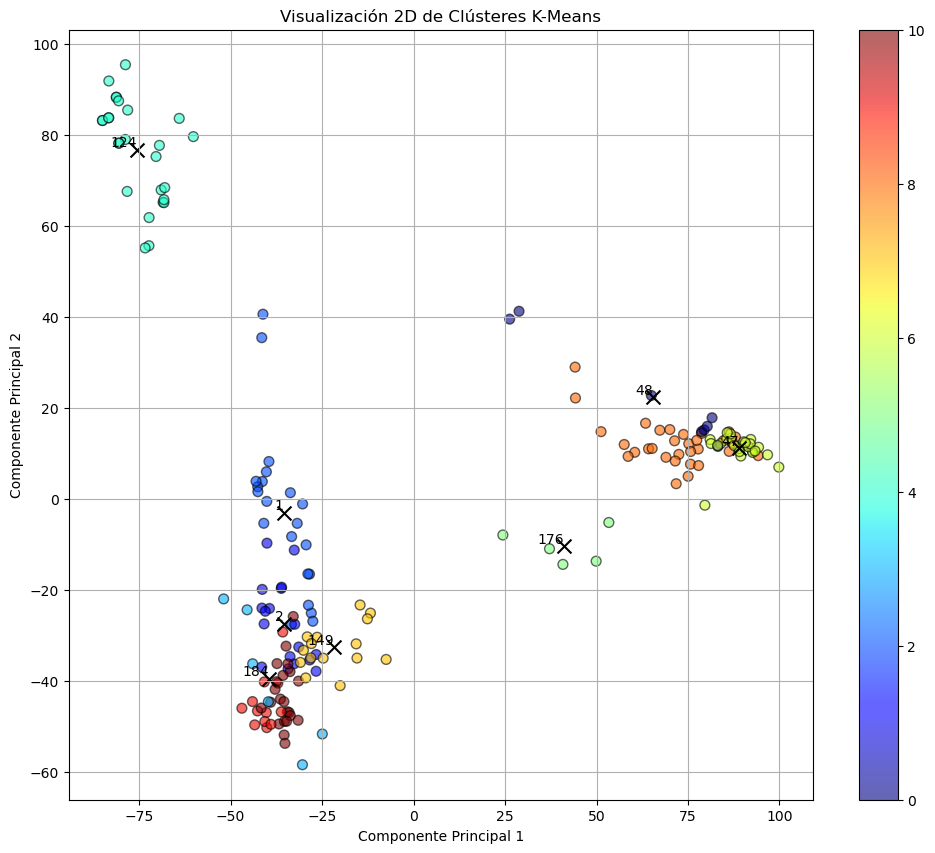

In [51]:
import matplotlib.pyplot as plt
import numpy as np

pca_2d = PCA(n_components=2)
data_pca_2d = pca_2d.fit_transform(data_pca)

centroides_2d = np.array([data_pca_2d[clusters_custom == i].mean(axis=0) for i in range(8)])

clase = classes.reset_index().rename(columns={"index": "Tissue", 0: "Cluster"})
clase["Cluster_assigned"] = clusters_custom

predominant_tissues = [clase[clase['Cluster_assigned'] == i]['Tissue'].value_counts().idxmax() for i in range(8)]

plt.figure(figsize=(12, 10))
scatter = plt.scatter(data_pca_2d[:, 0], data_pca_2d[:, 1], c=clusters_custom, cmap='jet', marker='o', edgecolor='k', s=50, alpha=0.6)

for i, tissue in enumerate(predominant_tissues):
    plt.scatter(centroides_2d[i, 0], centroides_2d[i, 1], c='black', marker='x', s=100)
    plt.text(centroides_2d[i, 0], centroides_2d[i, 1], tissue, fontsize=10, ha='right', va='bottom')

plt.colorbar(scatter)
plt.title('Visualización 2D de Clústeres K-Means')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()


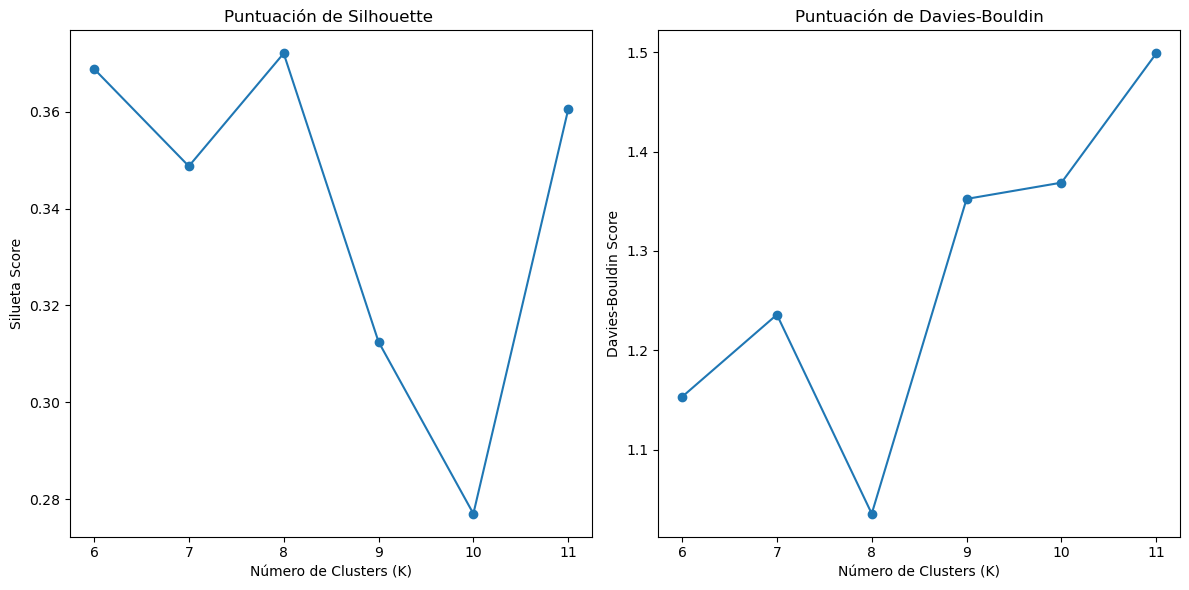

In [60]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

k_values = range(6, 12) 

silhouette_scores = []
davies_bouldin_scores = []

for k in k_values:
    centroides_final, clusters_custom = kmeans(data_pca, k, 4.5)
    
    silhouette = silhouette_score(data_pca, clusters_custom)
    davies_bouldin = davies_bouldin_score(data_pca, clusters_custom)
    
    silhouette_scores.append(silhouette)
    davies_bouldin_scores.append(davies_bouldin)

# Gráfica de Silueta y Davies-Bouldin
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.title('Puntuación de Silhouette ')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silueta Score')

plt.subplot(1, 2, 2)
plt.plot(k_values, davies_bouldin_scores, marker='o', linestyle='-')
plt.title('Puntuación de Davies-Bouldin')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Davies-Bouldin Score')

plt.tight_layout()
plt.show()

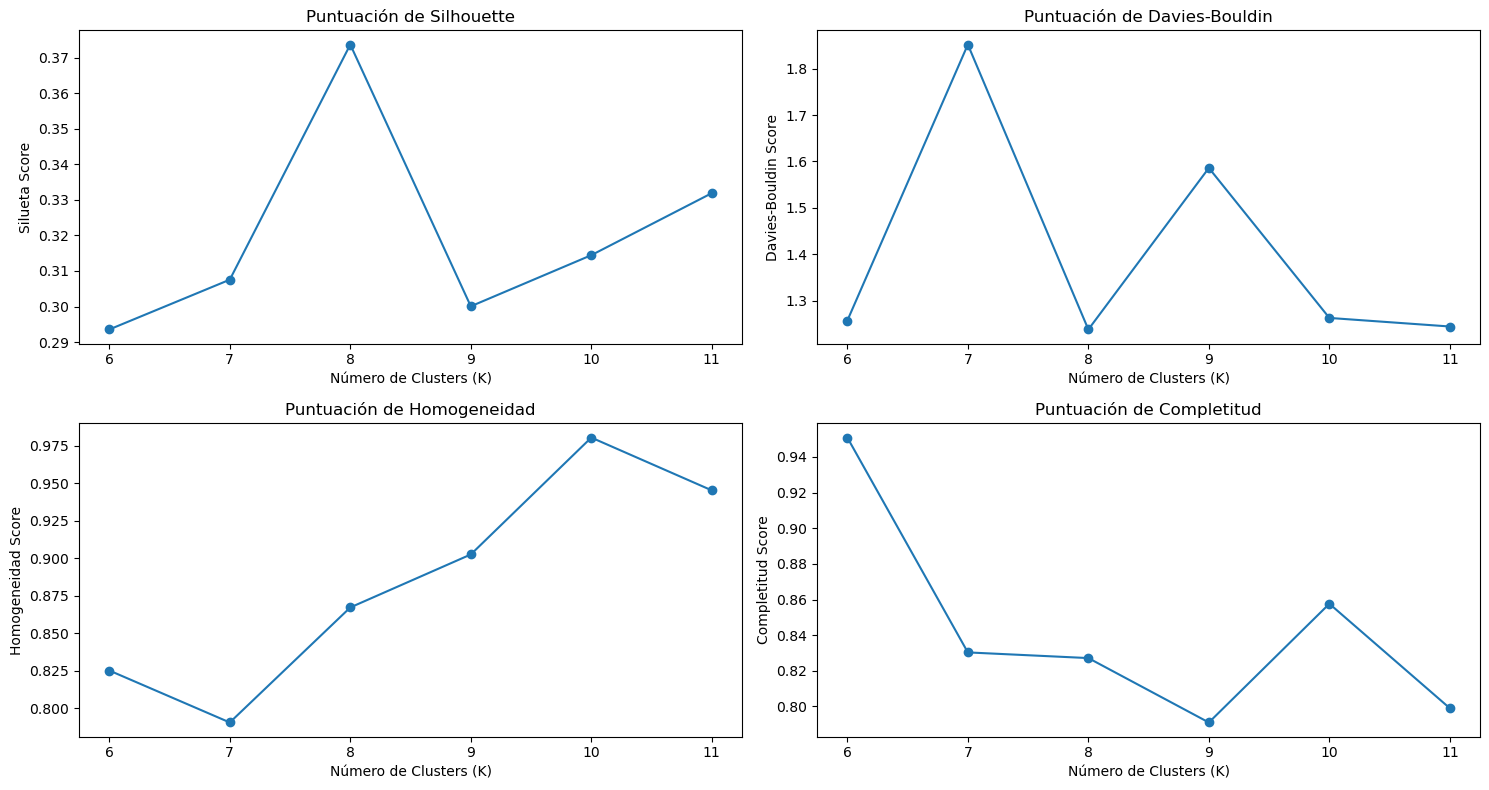

In [61]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, homogeneity_score, completeness_score
import matplotlib.pyplot as plt

k_values = range(6, 12) 

silhouette_scores = []
davies_bouldin_scores = []
homogeneity_scores = []
completeness_scores = []

true_labels = classes.to_numpy().flatten()

for k in k_values:
    #  función kmeans
    centroides_final, clusters_custom = kmeans(data_pca, k, 4.5)
    
    silhouette = silhouette_score(data_pca, clusters_custom)
    davies_bouldin = davies_bouldin_score(data_pca, clusters_custom)
    homogeneity = homogeneity_score(true_labels, clusters_custom)
    completeness = completeness_score(true_labels, clusters_custom)
    
    silhouette_scores.append(silhouette)
    davies_bouldin_scores.append(davies_bouldin)
    homogeneity_scores.append(homogeneity)
    completeness_scores.append(completeness)

# Gráfica de las métricas
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.title('Puntuación de Silhouette')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silueta Score')

plt.subplot(2, 2, 2)
plt.plot(k_values, davies_bouldin_scores, marker='o', linestyle='-')
plt.title('Puntuación de Davies-Bouldin')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Davies-Bouldin Score')

plt.subplot(2, 2, 3)
plt.plot(k_values, homogeneity_scores, marker='o', linestyle='-')
plt.title('Puntuación de Homogeneidad')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Homogeneidad Score')

plt.subplot(2, 2, 4)
plt.plot(k_values, completeness_scores, marker='o', linestyle='-')
plt.title('Puntuación de Completitud')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Completitud Score')

plt.tight_layout()
plt.show()


In [62]:
clusters_custom

array([ 0.,  4.,  0.,  4.,  4.,  0.,  0.,  0.,  4.,  0.,  4.,  0.,  0.,
        0.,  4.,  0.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3., 10., 10., 10., 10., 10., 10.,
       10., 10.,  6., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10.,  0.,  4.,  4.,  0.,  4.,
        4.,  4.,  4.,  0.,  4.,  4.,  4.,  4.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  4.,  1.,  1.,  9.,  9.,  9.,  4.,  4.,  4.,  9.,
        9.,  9.,  1.,  1.,  8.,  3.,  9.,  9.,  9.,  9.,  9.,  9.,  8.,
        8.,  1.,  1.,  1.,  1.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.,  7.,  7.,  7.,  7.,  9.,  9.,  9.,  9.,  9.,  9.,
        9.,  9.,  9.,  9.,  9.,  9.,  3.,  3.,  3.,  3.,  3.,  6

In [63]:
from sklearn.metrics import homogeneity_score, completeness_score,silhouette_score, davies_bouldin_score

In [64]:

homogeneity = homogeneity_score(classes.values.ravel(), clusters_custom)
completeness = completeness_score(classes.values.ravel(), clusters_custom)
silhouette = silhouette_score(data_pca, clusters_custom)
davies_bouldin = davies_bouldin_score(data_pca, clusters_custom)
print(f"Resultados:\nHomogeneity: {homogeneity:.2f}\nCompleteness: {completeness:.2f}\nSilhouette Score: {silhouette:.2f}\nDavies-Bouldin Index: {davies_bouldin:.2f}")

Resultados:
Homogeneity: 0.95
Completeness: 0.80
Silhouette Score: 0.33
Davies-Bouldin Index: 1.25


c:\Users\Omar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


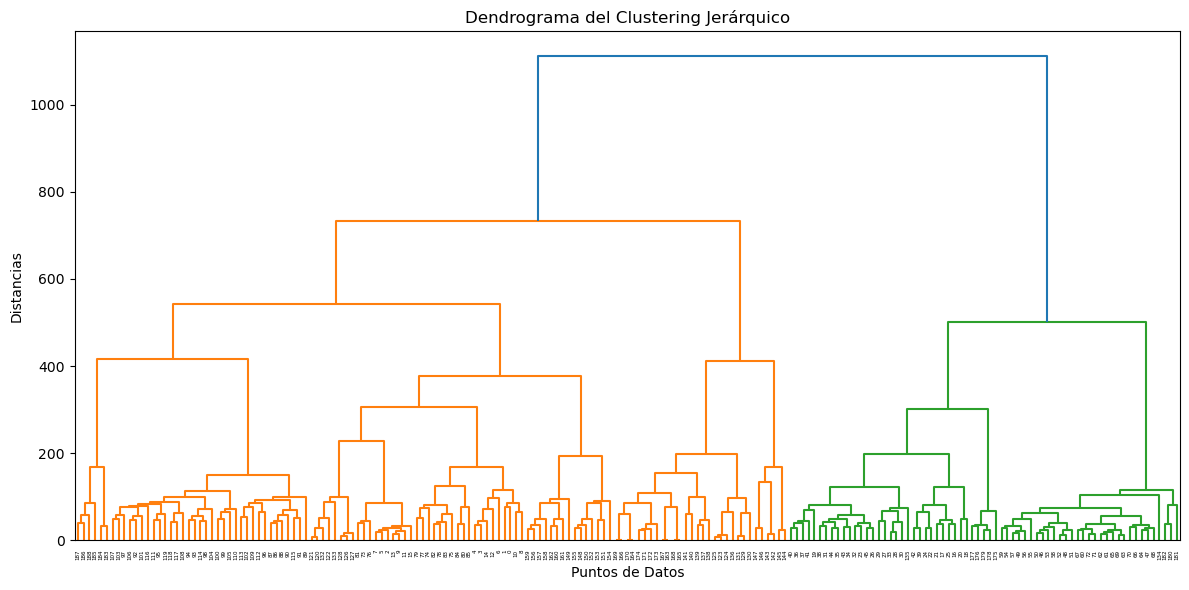

In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

k = 8 

# Clustering Jerárquico Aglomerativo (AHC)
model = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
model.fit(data_pca)

# Calculo de la matriz de enlace (Z) usando SciPy
Z = linkage(data_pca, 'ward')

plt.figure(figsize=(12, 6))
dendrogram(Z,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrograma del Clustering Jerárquico')
plt.xlabel('Puntos de Datos')
plt.xticks(fontsize=4)
plt.ylabel('Distancias')
plt.tight_layout()
plt.show()